## Read sentinel-2 satellite image

In [ ]:
file_dir = '/Users/wentingjiang/Downloads/S2A_MSIL2A_20200210T091121_N0214_R050_T35SKC_20200210T104450.SAFE/GRANULE/L2A_T35SKC_A024214_20200210T091322/IMG_DATA/R10m'

In [ ]:
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
tci = rasterio.open(file_dir +'/T35SKC_20200210T091121_TCI_10m.jp2', driver='JP2OpenJPEG').read(1)

In [ ]:
image = rasterio.open(file_dir +'/T35SKC_20200210T091121_TCI_10m.jp2', driver='JP2OpenJPEG')

In [ ]:
xres = (image.bounds.right - image.bounds.left) / image.width
yres = (image.bounds.top - image.bounds.bottom) / image.height

print(xres, yres)
print("Are the pixels square: {}".format(xres == yres))

10.0 10.0
Are the pixels square: True


In [ ]:
image.bounds.right

309780.0

In [ ]:
image.bounds.left

199980.0

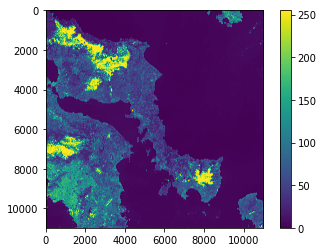

In [ ]:
fig = plt.imshow(tci)
plt.colorbar()

# Display the results.
plt.show()

In [ ]:
tci.shape

(10980, 10980)

In [ ]:
small = tci[9000:10980, 0:2000]

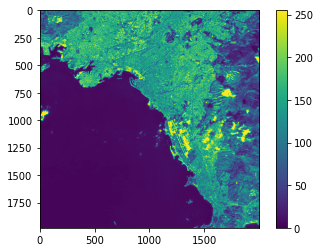

In [ ]:
fig = plt.imshow(small)
plt.colorbar()

# Display the results.
plt.show()

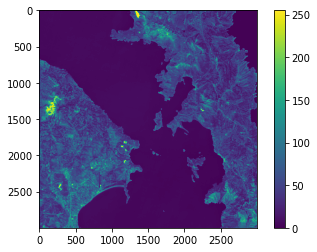

In [ ]:
fig = plt.imshow(tci[5000:8000, 3000:6000])
plt.colorbar()

# Display the results.
plt.show()

## create band ratio

In [ ]:
blue = rasterio.open(file_dir +'/T35SKC_20200210T091121_B02_10m.jp2',
                      driver='JP2OpenJPEG').read(1)

In [ ]:
blue = blue[9000:10980, 0:2000]

In [ ]:
green = rasterio.open(file_dir +'/T35SKC_20200210T091121_B03_10m.jp2', 
                      driver='JP2OpenJPEG').read(1)

In [ ]:
green = green[9000:10980, 0:2000]

In [ ]:
nir = rasterio.open(file_dir +'/T35SKC_20200210T091121_B08_10m.jp2', driver='JP2OpenJPEG').read(1)

In [ ]:
nir = nir[9000:10980, 0:2000]

In [ ]:
nir.shape

(10980, 10980)

In [ ]:
NDWI = (green - nir) / (green + nir)

In [ ]:
shallow_index = blue / green

In [ ]:
import numpy as np

In [ ]:
shallow_log = np.log(shallow_index)

In [ ]:
shallow_log

array([[-0.37899853, -0.41985385, -0.24889605, ..., -0.55850775,
        -0.69090251, -0.55267934],
       [-0.30830136, -0.23583967, -0.19370688, ..., -0.5999534 ,
        -0.61041847, -0.59485383],
       [-0.28109162, -0.18263657, -0.24029457, ..., -0.66711021,
        -0.5613779 , -0.5147549 ],
       ...,
       [ 0.61518564,  0.60451111,  0.6649763 , ...,  0.22474227,
         0.19583528,  0.12440871],
       [ 0.70219702,  0.59377471,  0.71149632, ...,  0.14698219,
         0.1156522 ,  0.18168278],
       [ 0.66647893,  0.6061358 ,  0.63090487, ...,  0.09531018,
         0.10724553,  0.23153734]])

In [ ]:
water_land = np.log(NDWI)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [ ]:
water_land[water_land<=1] = 1

In [ ]:
water_land[water_land>1] = 0

In [ ]:
water_land.shape

(1980, 2000)

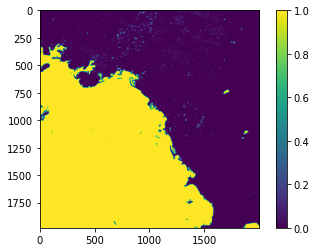

In [ ]:
fig = plt.imshow(water_land)
plt.colorbar()

# Display the results.
plt.show()

In [ ]:
final = water_land * shallow_log

In [ ]:
shallow_log[shallow_log<= -0.5] = -1

In [ ]:
final = final[0:1980,0:1980]

In [ ]:
final.shape

(1980, 1980)

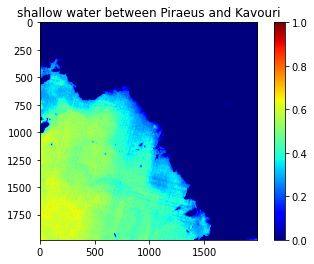

In [ ]:
# Use imshow plot image.
fig = plt.imshow(final, cmap='jet')
plt.colorbar()
plt.clim(0,1)
plt.title('shallow water between Piraeus and Kavouri')
# Display the results.
plt.show()

## Downsampling

In [ ]:
def rebin(a, shape):
    sh = shape[0],a.shape[0]//shape[0],shape[1],a.shape[1]//shape[1]
    return a.reshape(sh).mean(-1).mean(1)

In [ ]:
downsampled = rebin(final, (132, 132))

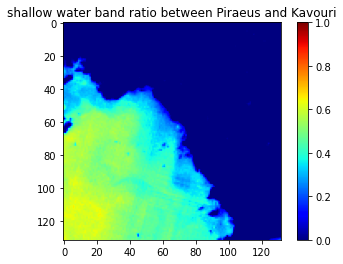

In [ ]:
# Use imshow plot image.
fig = plt.imshow(downsampled, cmap='jet')
plt.colorbar()
plt.clim(0,1)
plt.title('shallow water band ratio between Piraeus and Kavouri')
# Display the results.
plt.show()

## Read bathmetry data

In [ ]:
import numpy as np
ascii_grid = np.loadtxt("Area of interest.asc", skiprows=6)

In [ ]:
ascii_grid

array([[ -7.        ,  -6.25      ,  -9.25      , ..., -69.        ,
        -69.        , -67.62000275],
       [ -3.25      ,  -1.92999995,  -4.        , ..., -68.80999756,
        -68.25      , -69.25      ],
       [ -2.        ,  -3.75      ,  -3.        , ..., -69.25      ,
        -70.        , -70.5       ],
       ...,
       [207.77999878, 208.22999573, 208.69000244, ...,  68.86000061,
         68.15000153,  69.18000031],
       [207.74000549, 208.13999939, 208.55000305, ...,  82.58999634,
         83.55000305,  84.        ],
       [207.69000244, 208.05999756, 208.42999268, ...,  87.86000061,
         87.40000153,  94.        ]])

In [ ]:
ascii_grid.shape

(317, 378)

In [ ]:
bathmetry = ascii_grid.copy()

In [ ]:
bathmetry.shape

(317, 378)

In [ ]:
bathmetry[bathmetry <= 0] = -1000

In [ ]:
bathmetry_s = bathmetry[0:132, 50:182]

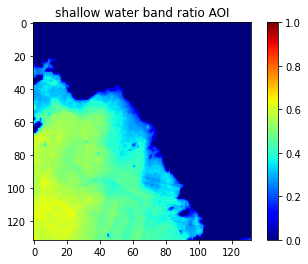

In [ ]:
# Use imshow plot image.
fig = plt.imshow(downsampled, cmap='jet')
plt.colorbar()

plt.clim(0,1)
plt.title('shallow water band ratio AOI')
# Display the results.
plt.show()

In [ ]:
downsampled.min()

-0.23197568356407638

In [ ]:
bathmetry_s.max()

94.36000061035156

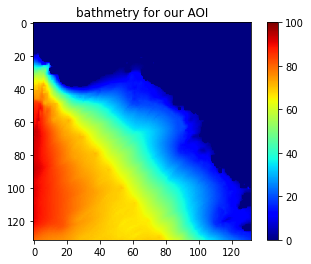

In [ ]:
# Use imshow plot image.
fig = plt.imshow(bathmetry_s, cmap='jet')
plt.colorbar()
plt.clim(0,100)

plt.title('bathmetry for our AOI')
# Display the results.
plt.show()

In [ ]:
bathmetry_s.max()

94.36000061035156

In [ ]:
x = downsampled.flatten()

In [ ]:
y = bathmetry_s.flatten()

In [ ]:
x

array([0.        , 0.        , 0.        , ..., 0.13676372, 0.1816137 ,
       0.20978999])

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame({'band_ratio':x, 'bathmetry':y})
#df.plot('x', 'y', kind='scatter')

In [ ]:
df_relevant = df[df.bathmetry != -1000]

In [ ]:
df_relevant2 = df_relevant[df.band_ratio > 0]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


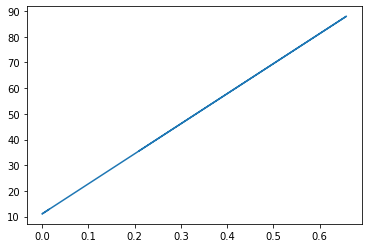

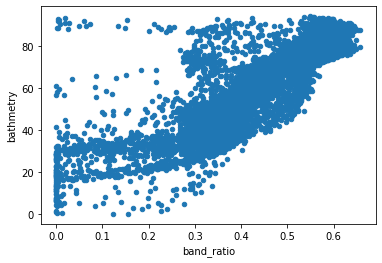

In [ ]:
plt.plot(x, y_pred)
df_relevant2.plot('band_ratio', 'bathmetry', kind='scatter')

In [ ]:
np.array(df_relevant2['band_ratio'])

array([0.01507479, 0.00356558, 0.01146188, ..., 0.1405736 , 0.1816137 ,
       0.20978999])

In [ ]:
from sklearn.linear_model import LinearRegression

x = np.array(df_relevant2['band_ratio']).reshape(-1, 1)
y = np.array(df_relevant2['bathmetry'])
reg = LinearRegression().fit(x, y)

In [ ]:
reg.score(x, y)

0.6805168792701264

In [ ]:
reg.coef_

array([117.00115346])

In [ ]:
reg.intercept_

11.030885482370792

In [ ]:
def convert_to_depths(ratio):
    depth = reg.intercept_ + reg.coef_ * x
    return depth

In [ ]:
x.min()

-5.3612921657094255

In [ ]:
y_pred = reg.predict(x)

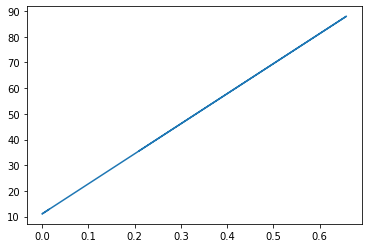

In [ ]:
plt.plot(x, y_pred)

## convert to depth

In [ ]:
final

array([[-0.        , -0.        , -0.        , ..., -0.        ,
        -0.        , -0.        ],
       [-0.        , -0.        , -0.        , ..., -0.        ,
        -0.        , -0.        ],
       [-0.        , -0.        , -0.        , ..., -0.        ,
        -0.        , -0.        ],
       ...,
       [ 0.61518564,  0.60451111,  0.6649763 , ...,  0.18419246,
         0.21772348,  0.12939372],
       [ 0.70219702,  0.59377471,  0.71149632, ...,  0.11938278,
         0.20931706,  0.14986435],
       [ 0.66647893,  0.6061358 ,  0.63090487, ...,  0.19092267,
         0.23440071,  0.20801467]])

In [ ]:
final_reshape = final.reshape(-1,1)

In [ ]:
import numpy as np
x = final_reshape
f = lambda x: reg.intercept_ + reg.coef_ * x
depths = f(x)

In [ ]:
depths.shape

(3920400, 1)

In [ ]:
depths.max()

662.0861916104201

In [ ]:
result = depths.reshape(final.shape)

In [ ]:
resutl2 = result * water_land[0:1980, 0:1980]

In [ ]:
resutl2.min()

-616.2464819605633

In [ ]:
result3 = resutl2.copy()

In [ ]:
result3[result3<=18] = 0

In [ ]:
result3[result3>18] = 1

In [ ]:
result3

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [ ]:
zoom_in = result3[750:1000, 750:1000]

In [ ]:
zoom_in = resutl2[750:1000, 750:1000]

In [ ]:
zoom_in.max()

94.12997354871429

In [ ]:
zoom_in2 = zoom_in.copy()

In [ ]:
zoom_in2[zoom_in2<=18] = 0

In [ ]:
zoom_in2[zoom_in2>18] = 1

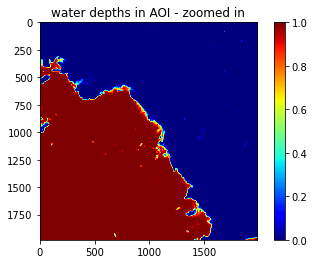

In [ ]:
# Use imshow plot image.
fig = plt.imshow(result3, cmap='jet')
plt.colorbar()
plt.clim(0,1)
# Display the results.
plt.title('water depths in AOI - zoomed in')
plt.show()

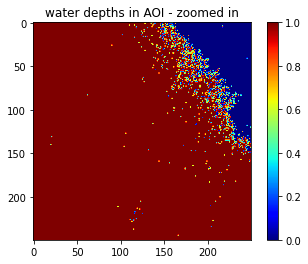

In [ ]:
# Use imshow plot image.
fig = plt.imshow(zoom_in2, cmap='jet')
plt.colorbar()
plt.clim(0,1)
# Display the results.
plt.title('water depths in AOI - zoomed in')
plt.show()

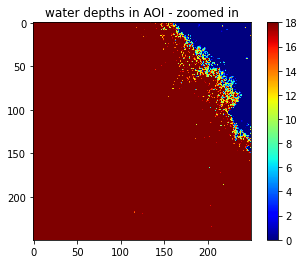

In [ ]:
# Use imshow plot image.
fig = plt.imshow(zoom_in, cmap='jet')
plt.colorbar()
plt.clim(0,18)
# Display the results.
plt.title('water depths in AOI - zoomed in')
plt.show()

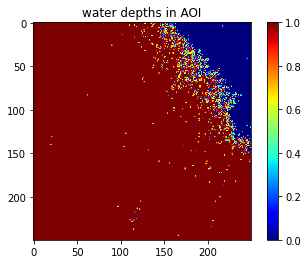

In [ ]:
# Use imshow plot image.
fig = plt.imshow(zoom_in, cmap='jet')
plt.colorbar()
plt.clim(0,1)
# Display the results.
plt.title('water depths in AOI')
plt.show()

In [ ]:
result3

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

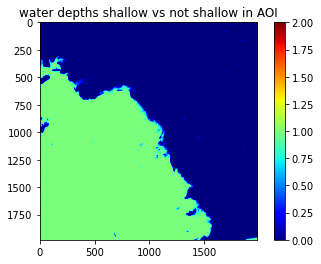

In [ ]:
# Use imshow plot image.
fig = plt.imshow(result3, cmap='jet')
plt.colorbar()
plt.clim(0,2)
# Display the results.
plt.title('water depths shallow vs not shallow in AOI')
plt.show()

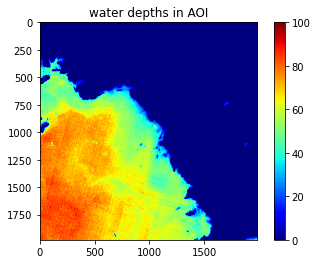

In [ ]:
# Use imshow plot image.
fig = plt.imshow(resutl2, cmap='jet')
plt.colorbar()
plt.clim(0,100)
# Display the results.
plt.title('water depths in AOI')
plt.show()

In [ ]:
np.savetxt('water_depths_AOI_binary.txt', result3)

In [ ]:
result3

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [ ]:
np.savetxt('water_depths_AOI.txt', resutl2)

In [ ]:
new_data = np.loadtxt('water_depths_AOI.txt')

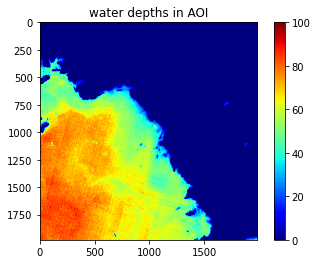

In [ ]:
# Use imshow plot image.
fig = plt.imshow(new_data, cmap='jet')
plt.colorbar()
plt.clim(0,100)
# Display the results.
plt.title('water depths in AOI')
plt.show()

## weather

In [ ]:
import os
import glob
import pandas as pd
from netCDF4 import Dataset
import numpy as np

In [ ]:
nc = Dataset('med00-cmcc-ssh-an-fc-hts_1590165202650.nc') 
#data_temp = nc.variables[variable][:]

In [ ]:
nc.variables

{'lon': <class 'netCDF4._netCDF4.Variable'>
 float32 lon(lon)
     units: degrees_east
     long_name: longitude
     standard_name: longitude
     axis: X
     _ChunkSizes: 1287
     _CoordinateAxisType: Lon
     valid_min: -17.291666
     valid_max: 36.291668
 unlimited dimensions: 
 current shape = (1287,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'time': <class 'netCDF4._netCDF4.Variable'>
 float64 time(time)
     units: minutes since 1900-01-01 00:00:00
     long_name: time
     standard_name: time
     calendar: standard
     axis: T
     _ChunkSizes: 24
     _CoordinateAxisType: Time
     valid_min: 63315390.0
     valid_max: 63325410.0
 unlimited dimensions: 
 current shape = (168,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'lat': <class 'netCDF4._netCDF4.Variable'>
 float32 lat(lat)
     units: degrees_north
     long_name: latitude
     standard_name: latitude
     axis: Y
     _ChunkSizes: 380
     _CoordinateAxisType: Lat
     val

In [ ]:
nc?

In [ ]:
nc.groups

{}

In [ ]:
data_temp = nc.variables['zos'][:]

In [ ]:
time_1 = data_temp[1, 0:380, 0:1287] # the first dimension is the time, then the location

In [ ]:
# Use imshow plot image.
plt.figure(figsize=(20,20))

fig = plt.imshow(time_1, cmap='jet')
plt.colorbar()
plt.title('hourly sea surface level CEMS')
# Display the results.
plt.show()

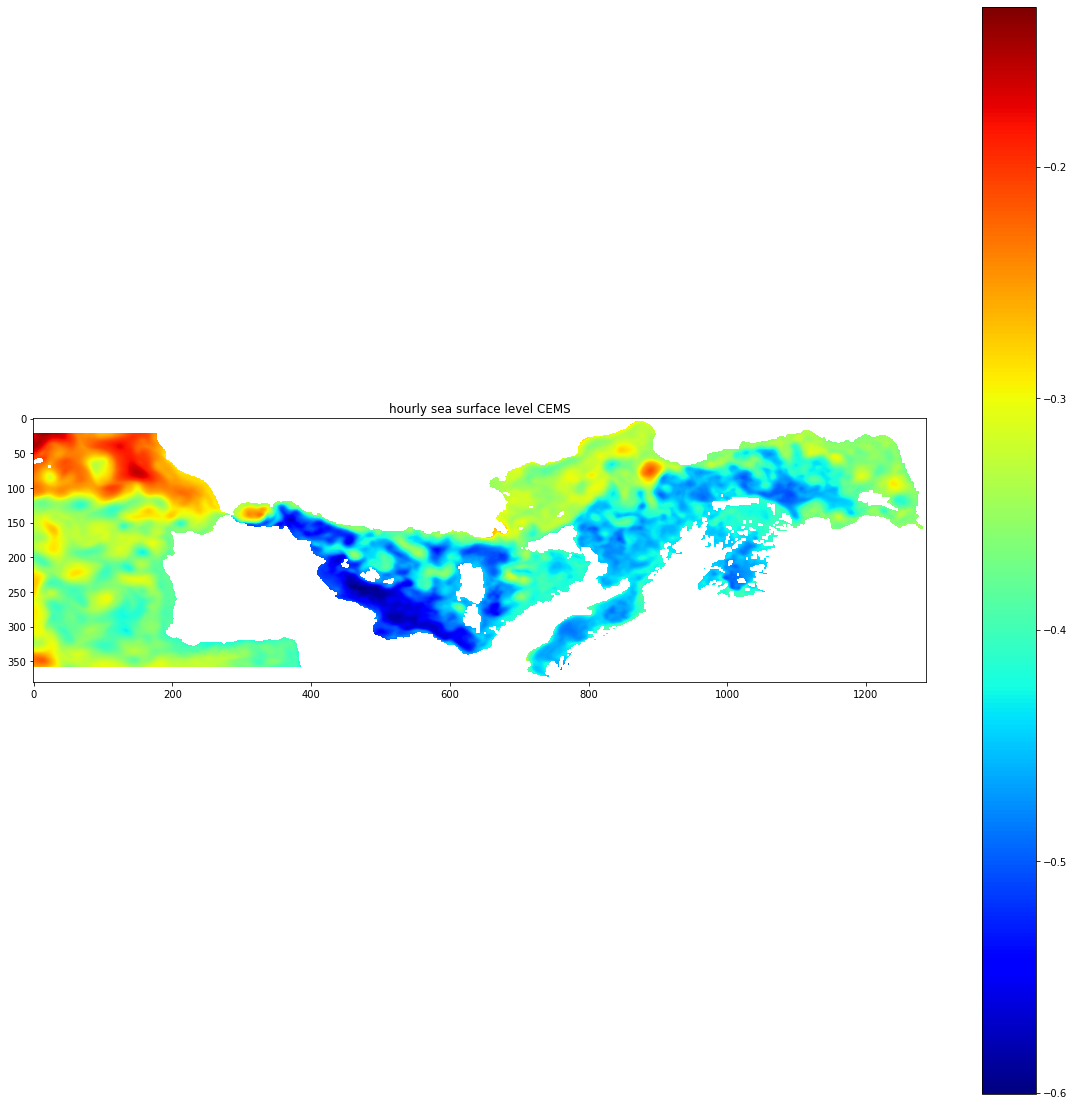

In [ ]:
# Use imshow plot image.
plt.figure(figsize=(20,20))

fig = plt.imshow(time_1, cmap='jet')
plt.colorbar()
plt.title('hourly sea surface level CEMS')
# Display the results.
plt.show()

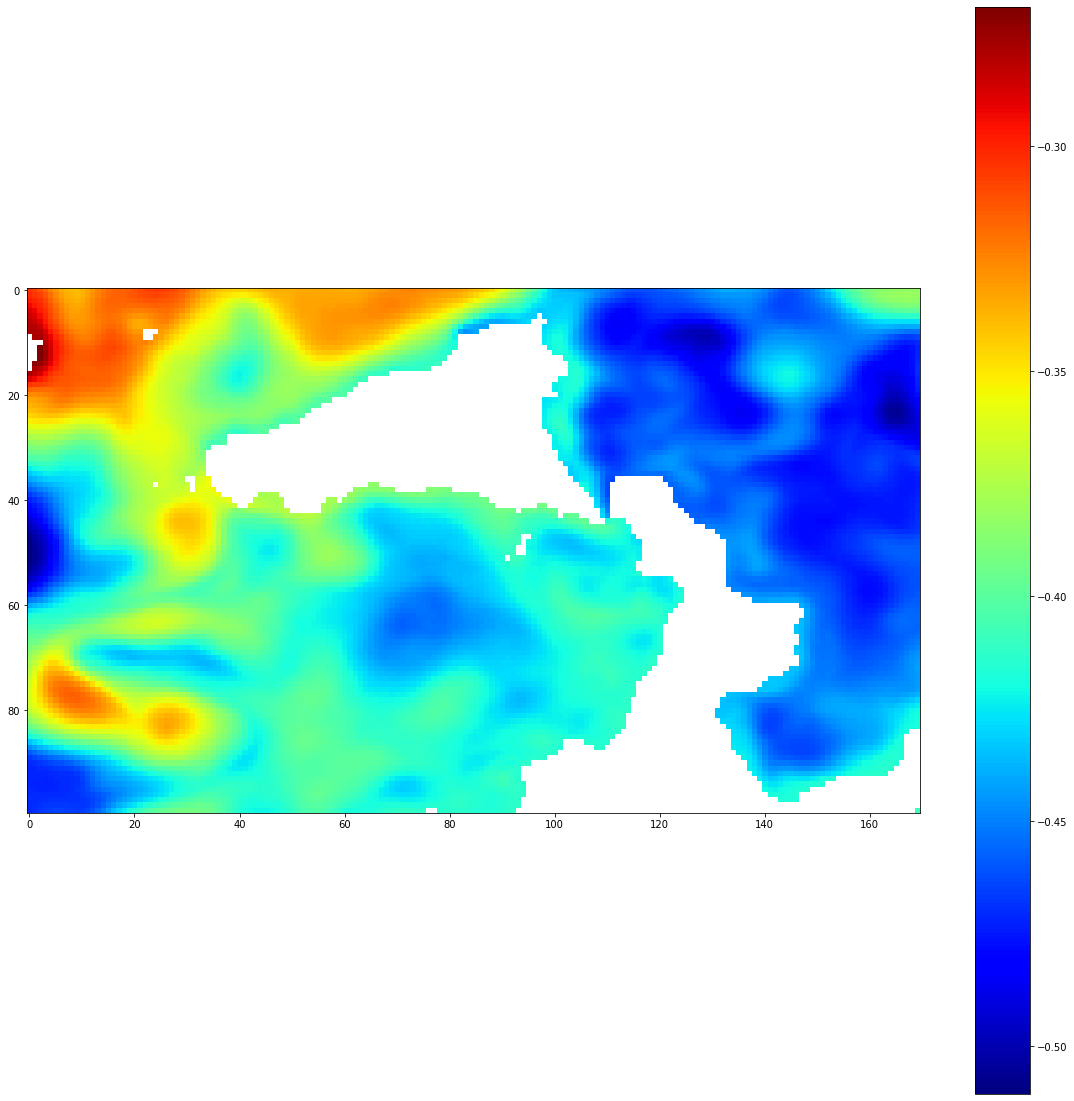

In [ ]:
# Use imshow plot image.
plt.figure(figsize=(20,20))

fig = plt.imshow(time_1[150:250, 680:850], cmap='jet')
plt.colorbar()

# Display the results.
plt.show()

## Read NAVY data

In [ ]:
'Peiraias Harbour to Faliro Bay.TIF'

In [ ]:
from PIL import Image

In [ ]:
im = Image.open('Peiraias Harbour to Faliro Bay.TIF')

In [ ]:
im.show()

In [ ]:
imarray = np.array(im)

In [ ]:
imarray.shape

(4578, 5914)

In [ ]:
imarray.max()

254

In [ ]:
imarray.min()

0

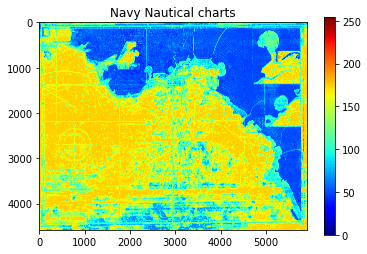

In [ ]:
# Use imshow plot image.
fig = plt.imshow(imarray, cmap='jet')
plt.colorbar()
plt.title('Navy Nautical charts')
# Display the results.
plt.show()

## other experimentations

In [1]:
emonet_path = '/Users/wentingjiang/Downloads/Delivery_EOMAP_Aileen_SDBmodel_Greece_vs1_20200525'

In [ ]:
emonet_path + '/SDB_GRC_AthensSE_EOMAP_20160101_20170131_15m_LAT_geotiff.tif'

'/Users/wentingjiang/Downloads/Delivery_EOMAP_Aileen_SDBmodel_Greece_vs1_20200525/SDB_GRC_AthensSE_EOMAP_20160101_20170131_15m_LAT_geotiff.tif'

In [ ]:
from PIL import Image
im = Image.open(emonet_path + '/SDB_GRC_AthensSE_EOMAP_20160101_20170131_15m_LAT_geotiff.tif')

In [ ]:
import numpy as np

In [ ]:
imarray = np.array(im)

In [ ]:
imarray

array([[-9999.      , -9999.      , -9999.      , ..., -9999.      ,
        -9999.      , -9999.      ],
       [-9999.      , -9999.      , -9999.      , ..., -9999.      ,
        -9999.      , -9999.      ],
       [-9999.      , -9999.      , -9999.      , ..., -9999.      ,
        -9999.      , -9999.      ],
       ...,
       [-9999.      , -9999.      , -9999.      , ...,   -92.3569  ,
          -92.16548 ,   -91.973724],
       [-9999.      , -9999.      , -9999.      , ...,   -92.414444,
          -92.22168 ,   -92.0287  ],
       [-9999.      , -9999.      , -9999.      , ..., -9999.      ,
        -9999.      , -9999.      ]], dtype=float32)

In [ ]:
imarray.shape

(2183, 2044)

In [ ]:
imarray.min()

-9999.0

In [ ]:
imarray.max()

0.0

In [ ]:
imarray

array([[-9999.      , -9999.      , -9999.      , ..., -9999.      ,
        -9999.      , -9999.      ],
       [-9999.      , -9999.      , -9999.      , ..., -9999.      ,
        -9999.      , -9999.      ],
       [-9999.      , -9999.      , -9999.      , ..., -9999.      ,
        -9999.      , -9999.      ],
       ...,
       [-9999.      , -9999.      , -9999.      , ...,   -92.3569  ,
          -92.16548 ,   -91.973724],
       [-9999.      , -9999.      , -9999.      , ...,   -92.414444,
          -92.22168 ,   -92.0287  ],
       [-9999.      , -9999.      , -9999.      , ..., -9999.      ,
        -9999.      , -9999.      ]], dtype=float32)

(array([[2183.,    0.,    0., ...,    0.,    0.,    0.],
        [ 791.,    0.,    0., ...,    0.,    0., 1392.],
        [ 788.,    0.,    0., ...,    0.,    0., 1395.],
        ...,
        [1756.,    0.,    0., ...,    0.,    0.,  427.],
        [1757.,    0.,    0., ...,    0.,    0.,  426.],
        [1757.,    0.,    0., ...,    0.,    0.,  426.]]),
 array([-9999. , -8999.1, -7999.2, -6999.3, -5999.4, -4999.5, -3999.6,
        -2999.7, -1999.8,  -999.9,     0. ], dtype=float32),
 <a list of 2044 Lists of Patches objects>)

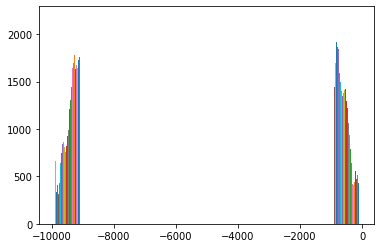

In [ ]:
import matplotlib.pyplot as plt
plt.hist(imarray) #,bins=[1,2,3,4,5])

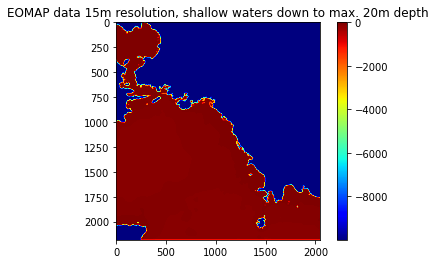

In [ ]:
# Use imshow plot image.
fig = plt.imshow(imarray, cmap='jet')
plt.colorbar()
plt.title('EOMAP data 15m resolution, shallow waters down to max. 20m depth')
# Display the results.
plt.show()

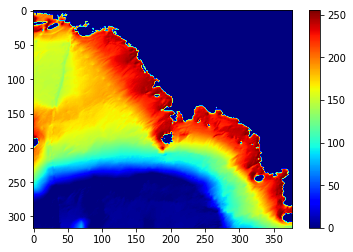

In [ ]:
# Use imshow plot image.
fig = plt.imshow(d1, cmap='jet')
plt.colorbar()

# Display the results.
plt.show()

In [ ]:
d1[d1 != 0] = 1

In [ ]:
d1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [ ]:
ascii_grid.shape

(317, 378)

In [ ]:
d1 = depth[:,1].shape

In [ ]:
d1

(317, 4)

In [ ]:
final = d1 * ascii_grid

In [ ]:
ascii_grid

array([[ -7.        ,  -6.25      ,  -9.25      , ..., -69.        ,
        -69.        , -67.62000275],
       [ -3.25      ,  -1.92999995,  -4.        , ..., -68.80999756,
        -68.25      , -69.25      ],
       [ -2.        ,  -3.75      ,  -3.        , ..., -69.25      ,
        -70.        , -70.5       ],
       ...,
       [207.77999878, 208.22999573, 208.69000244, ...,  68.86000061,
         68.15000153,  69.18000031],
       [207.74000549, 208.13999939, 208.55000305, ...,  82.58999634,
         83.55000305,  84.        ],
       [207.69000244, 208.05999756, 208.42999268, ...,  87.86000061,
         87.40000153,  94.        ]])

In [ ]:
final

array([[ -0.        ,  -0.        ,  -0.        , ...,  -0.        ,
         -0.        ,  -0.        ],
       [ -0.        ,  -0.        ,  -0.        , ...,  -0.        ,
         -0.        ,  -0.        ],
       [ -0.        ,  -0.        ,  -0.        , ...,  -0.        ,
         -0.        ,  -0.        ],
       ...,
       [207.77999878, 208.22999573, 208.69000244, ...,  68.86000061,
         68.15000153,  69.18000031],
       [207.74000549, 208.13999939, 208.55000305, ...,  82.58999634,
         83.55000305,  84.        ],
       [207.69000244, 208.05999756, 208.42999268, ...,  87.86000061,
         87.40000153,  94.        ]])

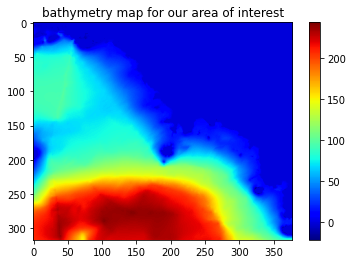

In [ ]:
# Use imshow plot image.
fig = plt.imshow(final, cmap='jet')
plt.colorbar()

# Display the results.

plt.title('bathymetry map for our area of interest')
plt.show()



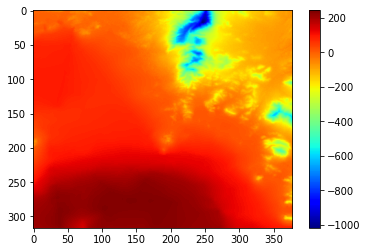

In [ ]:
# Use imshow plot image.
fig = plt.imshow(ascii_grid, cmap='jet')
plt.colorbar()

# Display the results.
plt.show()

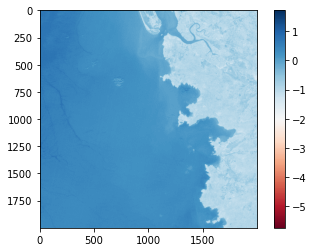

In [ ]:
flattened = shallow_log_s.reshape(-1,1)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
Kmean = KMeans(n_clusters=3)
Kmean.fit(flattened)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
Kmean.cluster_centers_

array([[ 0.43074538],
       [-0.90556708],
       [ 0.14272005]])

In [ ]:
X = flattened

In [ ]:
pred = Kmean.labels_

In [ ]:
clustered_img = pred.reshape(shallow_log_s.shape)

In [ ]:
clustered_img

array([[  1,   1,   1, ..., 100, 100, 100],
       [  1,   1,   1, ..., 100, 100, 100],
       [  1,   1,   1, ..., 100, 100, 100],
       ...,
       [  1,   1,   1, ..., 100, 100, 100],
       [  1,   1,   1, ..., 100, 100, 100],
       [  1,   1,   1, ..., 100, 100, 100]], dtype=int32)

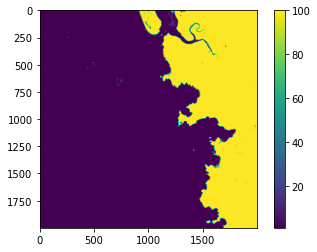

In [ ]:
# Use imshow plot image.
fig = plt.imshow(clustered_img)

plt.colorbar()
# Display the results.
plt.show()


In [ ]:
clustered_img_3clusters

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [2, 0, 2, ..., 1, 1, 1],
       [0, 0, 2, ..., 1, 1, 1]], dtype=int32)

In [ ]:
clustered_img_3clusters = pred.reshape(shallow_log_s.shape)

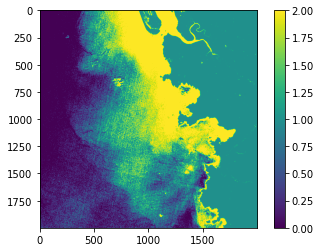

In [ ]:
# Use imshow plot image.
fig = plt.imshow(clustered_img_3clusters)

plt.colorbar()
# Display the results.
plt.show()


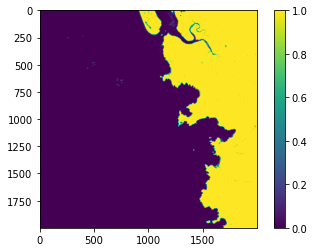

In [ ]:
# Use imshow plot image.
fig = plt.imshow(clustered_img)

plt.colorbar()
# Display the results.
plt.show()


In [ ]:
clustered_img

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)

In [ ]:
clustered_img[clustered_img == 100] = 0

In [ ]:
clustered_img

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)

In [ ]:
multiplied = clustered_img_3clusters * clustered_img

In [ ]:
multiplied[multiplied == 0] = 100

In [ ]:
clustered_img[clustered_img == 100] = 0

In [ ]:
original = flattened.reshape(clustered_img.shape)

In [ ]:
original

array([[ 0.54654371,  0.597837  ,  0.69839654, ..., -0.76529808,
        -0.63981774, -0.51279413],
       [ 0.62523597,  0.58996294,  0.57054486, ..., -0.65429225,
        -0.67378281, -0.55618133],
       [ 0.76058846,  0.70897865,  0.57944459, ..., -0.64729388,
        -0.62378605, -0.79892083],
       ...,
       [ 0.47501617,  0.47656103,  0.44587465, ..., -0.83710787,
        -0.77652879, -0.9635098 ],
       [ 0.2345322 ,  0.30271995,  0.25671985, ..., -0.82444394,
        -0.6991532 , -0.92604691],
       [ 0.29799144,  0.35043792,  0.25978457, ..., -1.13792939,
        -0.89466318, -1.0478972 ]])

In [ ]:
final = original * clustered_img

In [ ]:
final.min()

-0.2972515234679316

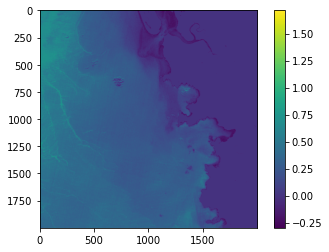

In [ ]:
# Use imshow plot image.
fig = plt.imshow(final)

plt.colorbar()
# Display the results.
plt.show()

In [ ]:
blue.max()

14232

In [ ]:
blue.min()

1

In [ ]:
shallow_index.max()

351.0

In [ ]:
shallow_index.min()

0.0014684287812041115

In [ ]:
shallow_index = blue/green # the bigger the value, the deeper the depth

In [ ]:
shallow_index.max()

106.0

In [ ]:
shallow_index.min()

0.001483679525222552

In [ ]:
shallow_index

array([[1.55769231, 1.64444444, 1.70676692, ..., 0.97819315, 0.96055227,
        0.98311111],
       [1.53846154, 1.57894737, 1.61594203, ..., 0.9643403 , 0.94470925,
        0.97410714],
       [1.79710145, 1.63888889, 1.73913043, ..., 0.98062593, 0.95462795,
        0.96223176],
       ...,
       [1.25      , 1.36764706, 1.18493151, ..., 0.8045977 , 1.02421308,
        0.95848375],
       [1.51694915, 1.26959248, 1.38116592, ..., 0.87405542, 1.19897959,
        1.02189781],
       [1.36842105, 1.26821192, 1.43269231, ..., 1.01262626, 1.20853081,
        1.04912281]])

In [ ]:
shallow_index.min()

0.000423728813559322

In [ ]:
import numpy as np

In [ ]:
shallow_log = np.log(shallow_index)

In [ ]:
shallow_log.max()

6.493753839851686

In [ ]:
shallow_log.min()

-7.7664168980196555

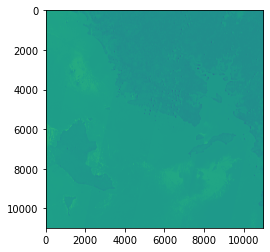

In [ ]:
# Use imshow plot image.
fig = plt.imshow(shallow_log)


# Display the results.
plt.show()

In [ ]:
import matplotlib as mpl
from matplotlib import pyplot

In [ ]:
#%matplotlib inline

cmap = mpl.colors.ListedColormap(['blue','green','orange','red'])
bounds=[-7, -3, 1, 4]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

#fig, ax = subplots(figsize=(10,5))
fig, ax = plt.subplots(figsize=(10,10))

# tell imshow about color map so that only set colors are used
ax = pyplot.imshow(shallow_index, #[0:50, 200:250], #interpolation='nearest',
                    cmap = cmap,norm=norm);

# make a color bar

#fig.title('This is a somewhat long figure title', fontsize=16)

cbaxes = fig.add_axes([0.8, 0.1, 0.03, 0.8]) 

pyplot.colorbar(ax,cax = cbaxes, cmap=cmap,
                norm=norm,boundaries=bounds,ticks=[-7, -3, 1, 4])

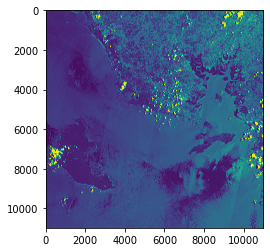

In [ ]:
# Use imshow plot image.
fig = plt.imshow(tci)

# Display the results.
plt.show()

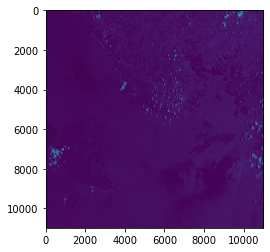

In [ ]:
# Use imshow plot image.
fig = plt.imshow(red)

# Display the results.
plt.show()

In [ ]:
os.chdir(file_dir)

In [ ]:
os.getcwd()

'/Users/wentingjiang/PycharmProjects/image/image-access/data/S3B_SY_2_VG1____20200429T203348_20200430T203348_20200501T165327_SOUTH_AMERICA_____LN2_O_ST_002.SEN3'

In [ ]:
from netCDF4 import Dataset

In [ ]:
NDVI = Dataset("NDVI.nc")

In [ ]:
NDVI.variables

{'NDVI': <class 'netCDF4._netCDF4.Variable'>
 uint8 NDVI(latitude, longitude)
     _FillValue: 255
     add_offset: -0.08
     grid_mapping: crs
     long_name: Normalized difference vegetation index
     scale_factor: 0.004
     standard_name: normalized_difference_vegetation_index
     valid_max: 250
     valid_min: 0
 unlimited dimensions: 
 current shape = (9071, 6720)
 filling on,
 'crs': <class 'netCDF4._netCDF4.Variable'>
 vlen crs(crs)
     grid_mapping_name: latitude_longitude
     inverse_flattening: 298.257223563
     long_name: Coordinate reference system
     longitude_of_prime_meridian: 0.0
     semi_major_axis: 6378137.0
     standard_name: coordinate_reference_system
 vlen data type: <class 'str'>
 unlimited dimensions: 
 current shape = (1,),
 'lat_bnds': <class 'netCDF4._netCDF4.Variable'>
 float64 lat_bnds(latitude, vertices)
     long_name: latitude cell boundaries
     standard_name: latitude_cell_boundaries
 unlimited dimensions: 
 current shape = (9071, 2)
 filli

In [ ]:
data_temp = NDVI.variables['NDVI'][:]

In [ ]:
data_temp

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=255,
  dtype=float32)

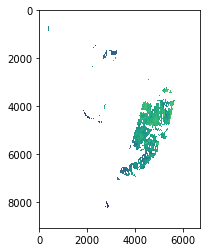

In [ ]:
# Use imshow plot image.
fig = plt.imshow(data_temp)

# Display the results.
plt.show()

In [ ]:
b2 = Dataset('B2.nc')

In [ ]:
b2.variables

{'B2': <class 'netCDF4._netCDF4.Variable'>
 int16 B2(latitude, longitude)
     _FillValue: -10000
     bandwidth: 35.0
     grid_mapping: crs
     long_name: Surface reflectance for B2 channel
     scale_factor: 1e-04
     standard_name: surface_reflectance_for_b2_channel
     valid_max: 10000
     valid_min: 0
     wavelength: 645.0
 unlimited dimensions: 
 current shape = (9071, 6720)
 filling on,
 'crs': <class 'netCDF4._netCDF4.Variable'>
 vlen crs(crs)
     grid_mapping_name: latitude_longitude
     inverse_flattening: 298.257223563
     long_name: Coordinate reference system
     longitude_of_prime_meridian: 0.0
     semi_major_axis: 6378137.0
     standard_name: coordinate_reference_system
 vlen data type: <class 'str'>
 unlimited dimensions: 
 current shape = (1,),
 'lat_bnds': <class 'netCDF4._netCDF4.Variable'>
 float64 lat_bnds(latitude, vertices)
     long_name: latitude cell boundaries
     standard_name: latitude_cell_boundaries
 unlimited dimensions: 
 current shape = (9

In [ ]:
data_b2 = b2.variables['B2'][:]

In [ ]:
data_b2

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=-10000,
  dtype=float32)

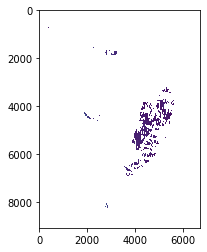

In [ ]:
# Use imshow plot image.
fig = plt.imshow(data_b2)

# Display the results.
plt.show()

### Products with high cloud coverage